# LightGBM Model

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
plt.rcParams['font.family'] = 'Arial'

In [2]:
data = pd.read_csv('data.csv')
data=data.loc[:, 'Ng1':'DG']
x=data.loc[:, 'Ng1':'Css']
x[['Tr','Cls','Pb', 'Css']]=x[['Tr','Cls','Pb', 'Css']].astype('category')

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x[['Ng1','Ng2','Ng3','Nfl','Na','Pa','Ph']] = \
scaler.fit_transform(x[['Ng1','Ng2','Ng3','Nfl','Na','Pa','Ph']])
y=data.loc[:, 'DG']
y=y.astype('category')

In [4]:
from sklearn.model_selection import train_test_split
indices = range(len(y))

x_train, x_test, y_train, y_test, indices_train,indices_test = \
train_test_split(x, y, indices, test_size=0.3,random_state=1)

In [5]:
from lightgbm import LGBMClassifier
cat_fea=['Tr','Cls','Pb', 'Css']
fea_names=x.columns
opt_model = LGBMClassifier(learning_rate=0.1, n_estimators=1200,num_leaves=100,
                           max_depth = 8,colsample_bytree=0.8,subsample=0.8)

opt_model.fit(x_train, y_train)

LGBMClassifier(colsample_bytree=0.8, max_depth=8, n_estimators=1200,
               num_leaves=100, subsample=0.8)

In [6]:
from sklearn import metrics
y_pred = opt_model.predict(x_test)
metrics.accuracy_score(y_test,y_pred)

0.8969310494631664

# Feautre Importance

In [7]:
feature_names = x.columns
feature_names

Index(['Ng1', 'Ng2', 'Ng3', 'Nfl', 'Na', 'Pa', 'Ph', 'Cls', 'Tr', 'Pb', 'Css'], dtype='object')

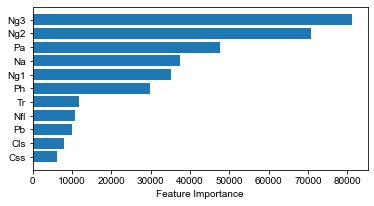

In [8]:
sorted_idx = opt_model.feature_importances_.argsort()

plt.figure(figsize=(6,3))
plt.barh(feature_names[sorted_idx], opt_model.feature_importances_[sorted_idx])
plt.xlabel("Feature Importance")
plt.savefig('Feature Importance.svg',bbox_inches='tight')

plt.show()
plt.close()

# SHAP

In [9]:
fea_names=x.columns.values
fea_names

array(['Ng1', 'Ng2', 'Ng3', 'Nfl', 'Na', 'Pa', 'Ph', 'Cls', 'Tr', 'Pb',
       'Css'], dtype=object)

In [10]:
import shap
shap.initjs()

X_shap = x

explainer = shap.TreeExplainer(opt_model)
shap_values = explainer.shap_values(X_shap)

In [11]:
shap_values_0=shap_values[0]
shap_values_1=shap_values[1]
shap_values_2=shap_values[2]

In [12]:
import numpy as np

shap_values_0=shap_values[0]
np.mean(shap_values_0, axis=0)
data0 = pd.DataFrame(shap_values_0)
data0.to_excel('data0.xlsx')

In [13]:
np.mean(shap_values_1, axis=0)

array([-0.00520264, -0.00080547,  0.00236183, -0.00636935,  0.00091233,
        0.00055066,  0.01271613,  0.00036287,  0.00317306, -0.00078861,
       -0.00651622])

In [14]:
np.mean(shap_values_2, axis=0)

array([-0.04084752,  0.00400498, -0.00229437,  0.03031951,  0.00921089,
        0.01259853,  0.00134925, -0.00058387, -0.02033701,  0.00638574,
        0.00193886])

In [15]:
explainer.expected_value

[-4.076969675613859, -0.26624372080289976, -3.640650566078378]

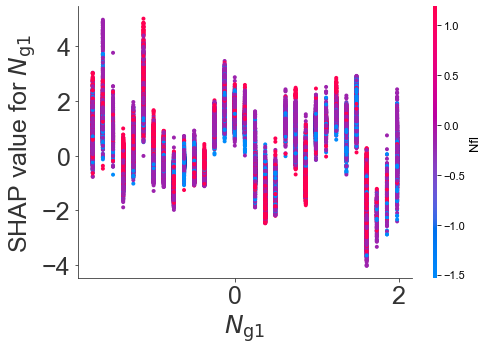

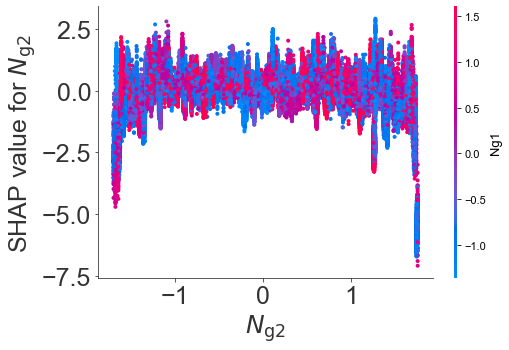

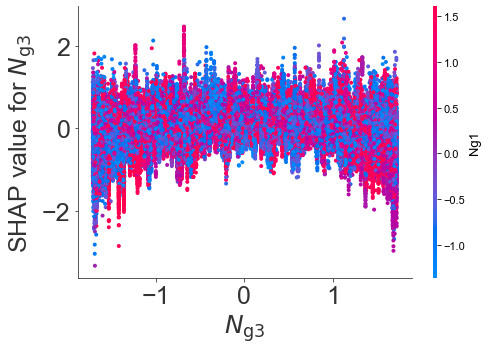

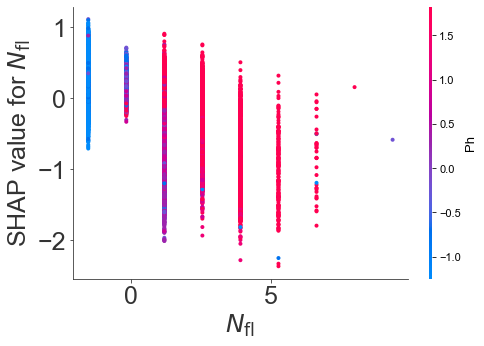

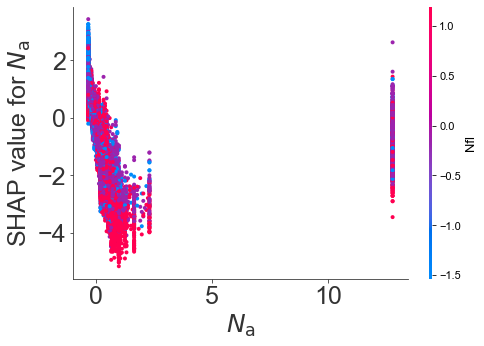

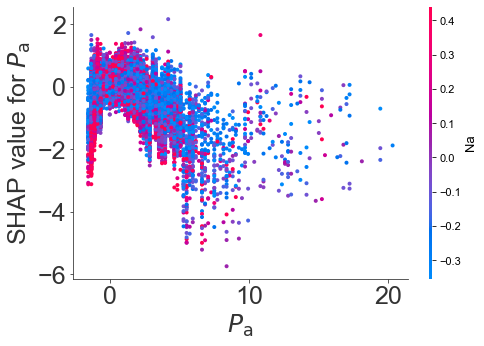

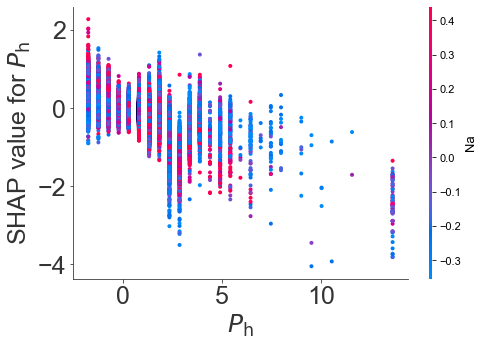

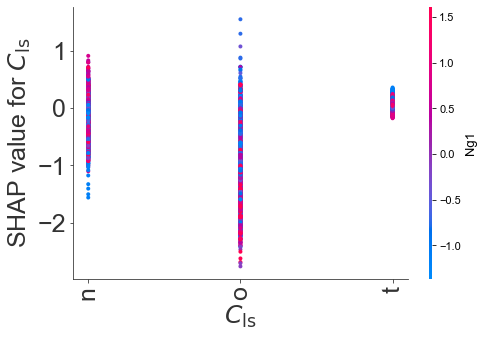

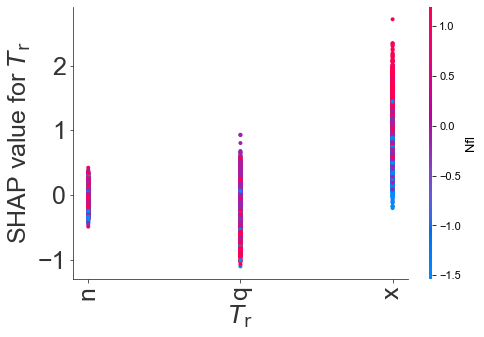

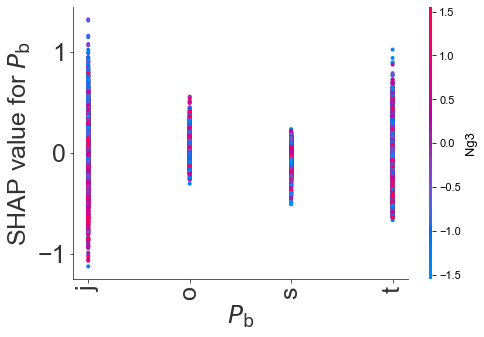

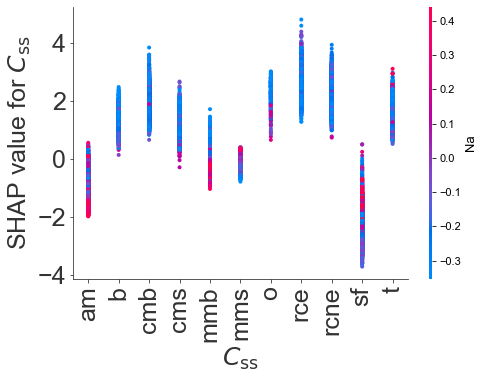

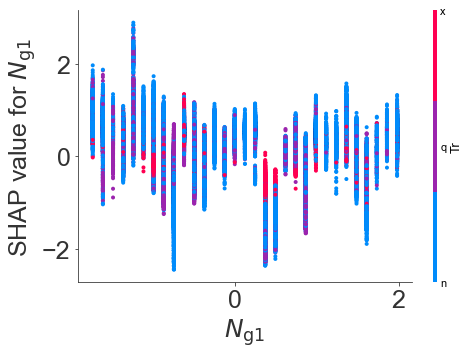

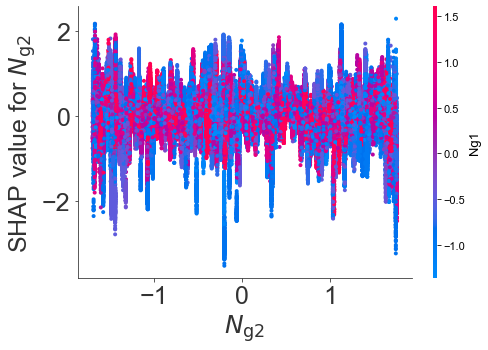

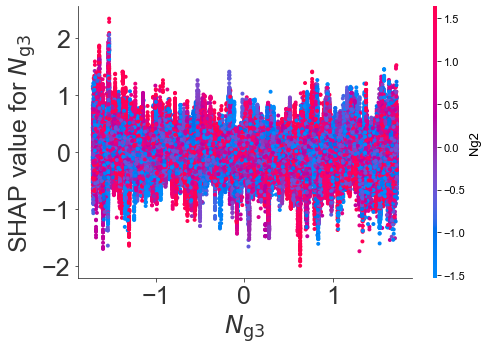

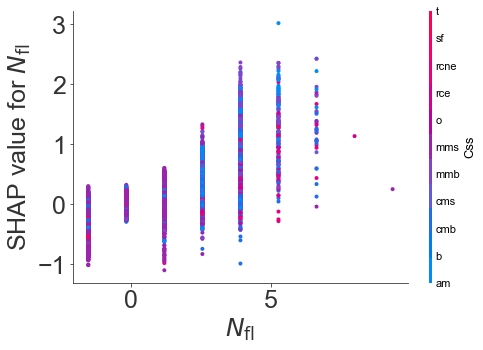

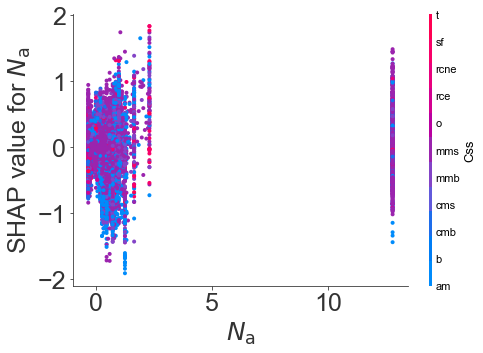

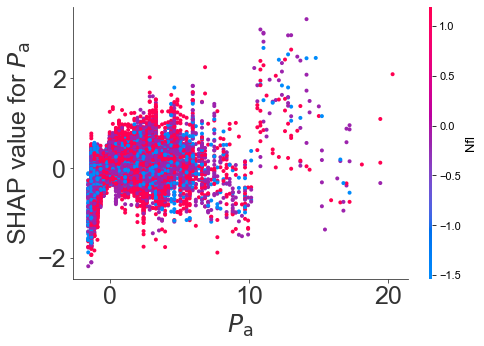

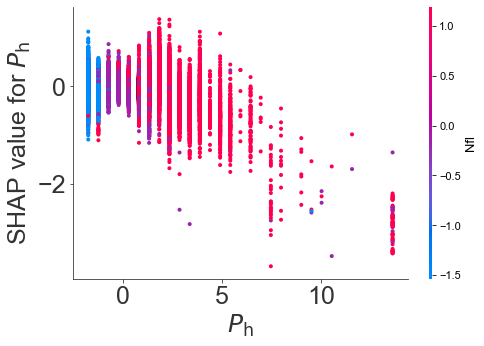

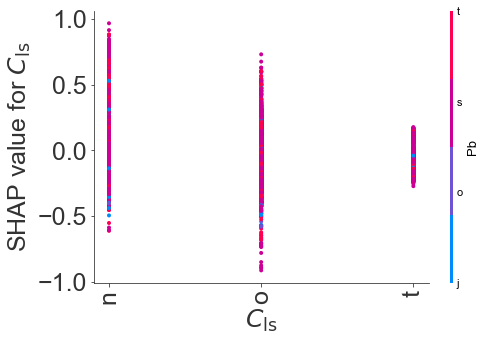

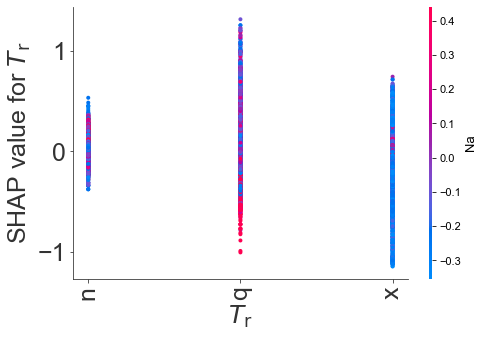

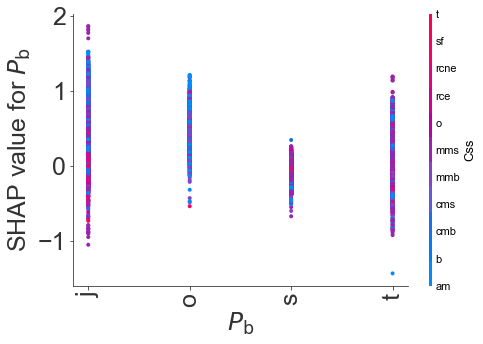

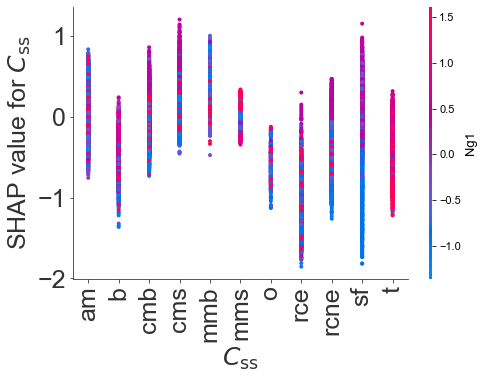

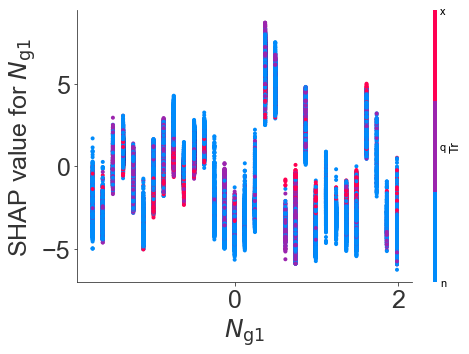

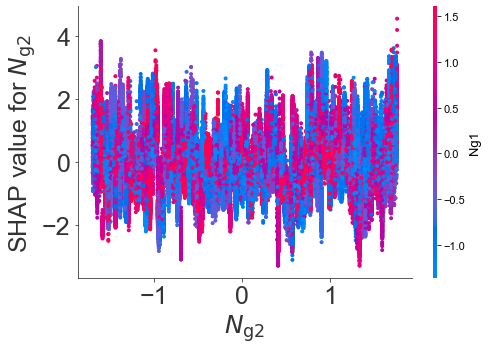

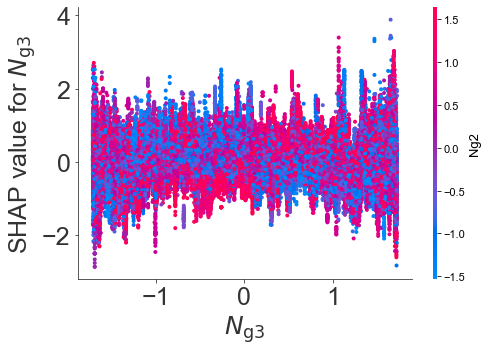

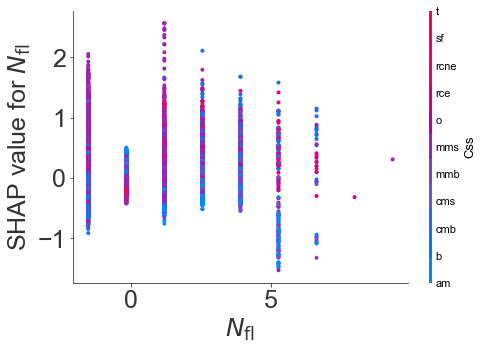

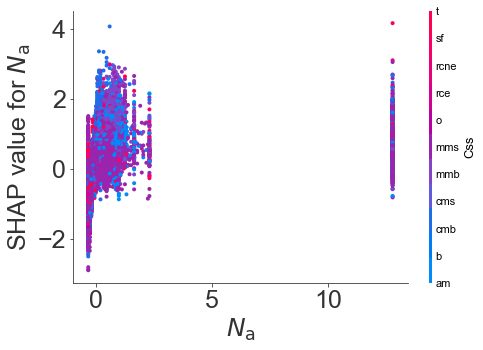

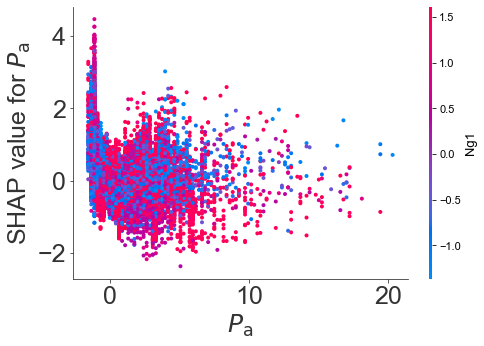

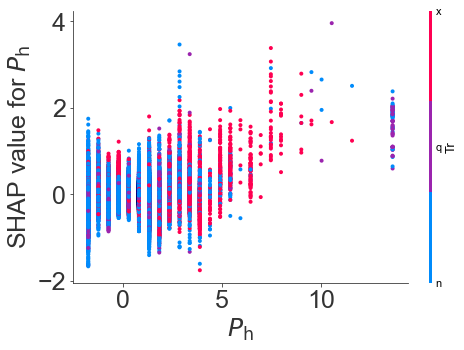

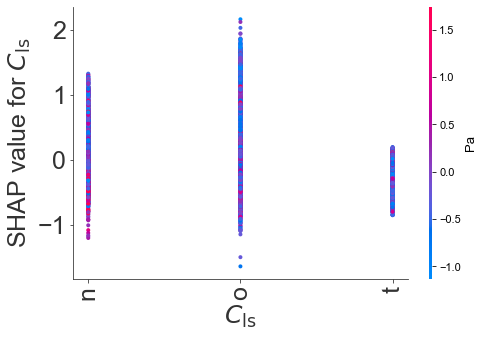

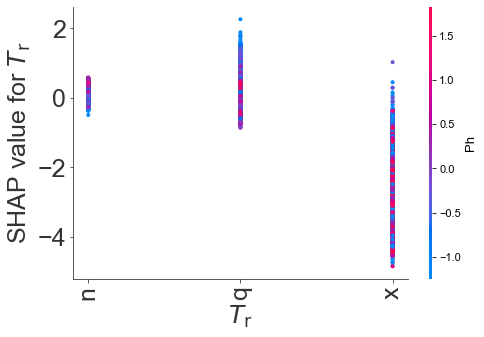

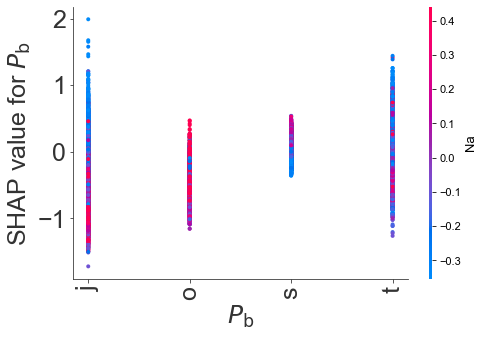

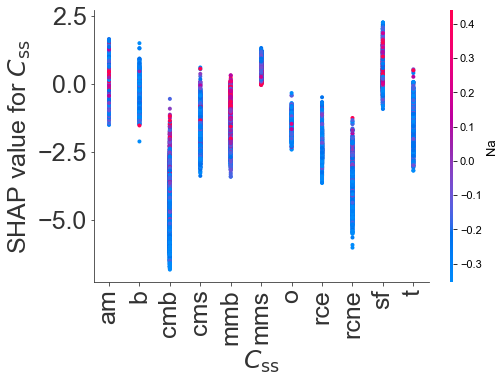

In [16]:
n=1
for i in range(0,3):
    for name in X_shap.columns:
        shap.dependence_plot(name, shap_values[i], x, display_features=X_shap,show=False) 
        y1=str(name)[0]
        y2=str(name)[1:]
        yl="SHAP value for ${"+y1+"}_\mathrm{"+y2+"}$"
        xl="${"+y1+"}_\mathrm{"+y2+"}$"
        plt.xlabel(xl,fontsize=25)
        plt.ylabel(yl,fontsize=25)
        plt.tick_params(labelsize=25)
        plt.savefig("./plot_interact/class" + str(i+1) +"SHAP_scatter" + str(n) +".svg",
                    format="svg",dpi=1200,bbox_inches='tight')
        plt.show()
        plt.close()
        n=n+1

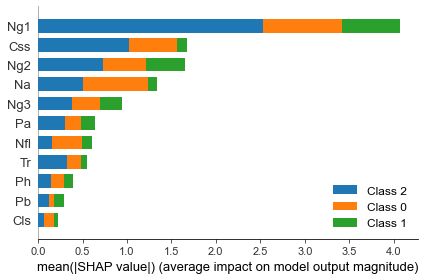

In [17]:
shap.summary_plot(shap_values, X_shap,show=False,plot_size=(6,4),color=plt.get_cmap("tab10"))
plt.savefig('SHAP_summary_bar.svg')

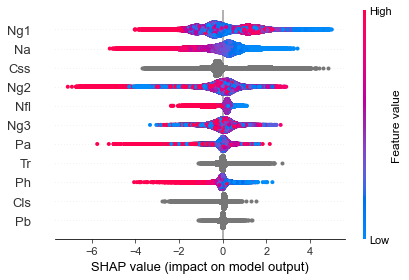

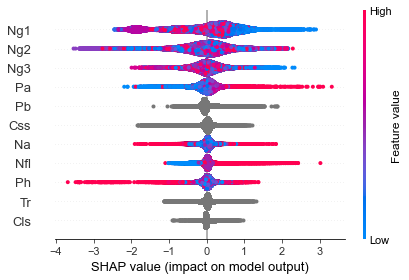

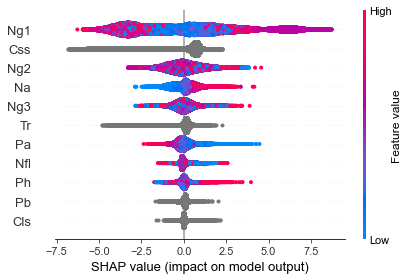

In [18]:
for i in range(0,3):
    shap.summary_plot(shap_values[i], X_shap,plot_type='dot',show=False,plot_size=(6,4)) 
    plt.savefig('SHAP_summary_dot'+str(i)+'.svg', dpi=1200)
    plt.show()
    plt.close()